In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ct=pd.read_csv('Ecommerce Customers')
ct.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


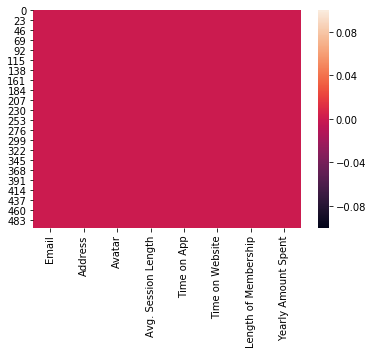

In [5]:
sns.heatmap(ct.isnull())

In [5]:
ct.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


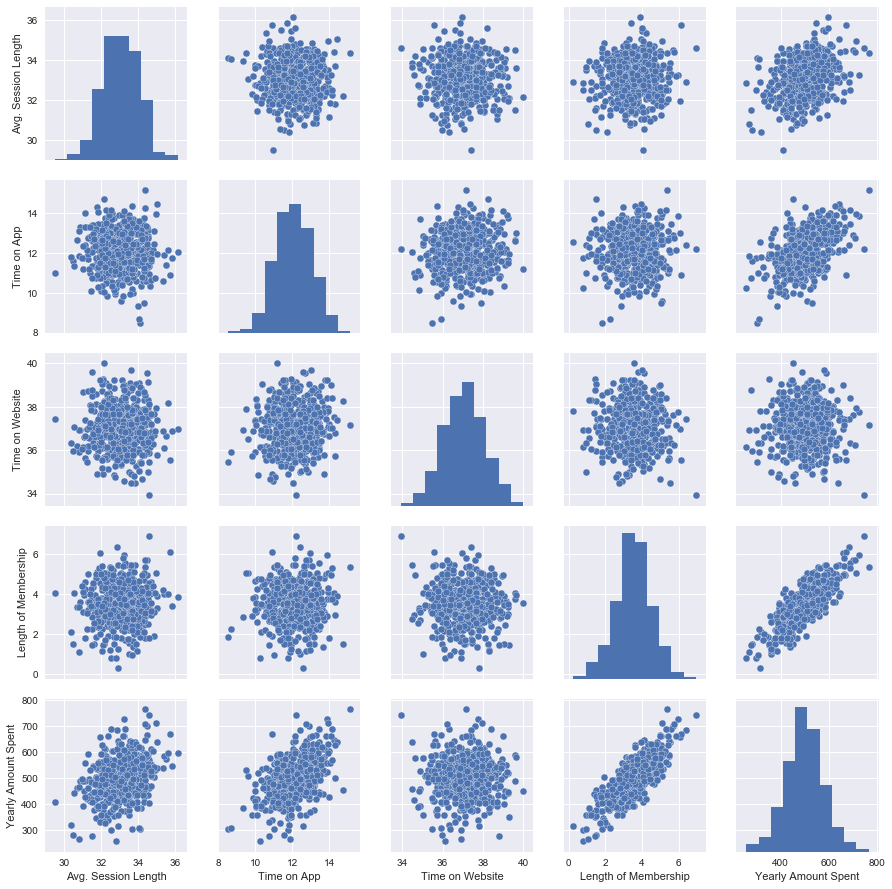

In [19]:
sns.pairplot(ct)
# pretty match with what I got from above
# length of member ship is pretty obvious
# the more important is to see the time spent on app or website

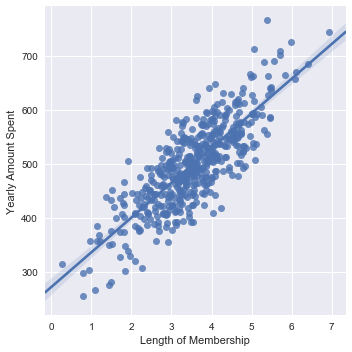

In [23]:
# get a linear model plot
sns.lmplot(data=ct,x='Length of Membership', y='Yearly Amount Spent')

In [24]:
# create training and testing data
ct.columns
# easier to check the column name

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
# set up 2 arrays x, and y. Y is the one need to be predicted
x=ct[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y=ct['Yearly Amount Spent']

In [12]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [13]:
# start to train the model
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# coefficients of the model
lrm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [15]:
# predict the test data
predictions=lrm.predict(x_test)

Text(0,0.5,'Predicted values')

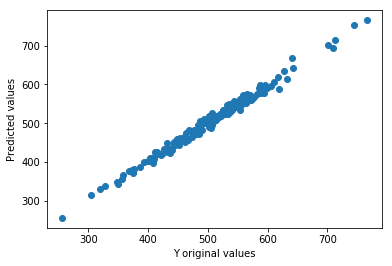

In [20]:
# use all other variable to predict y which is the yealy amount spent
plt.scatter(y_test, predictions)
plt.xlabel('Y original values')
plt.ylabel('Predicted values')
# great model on the test data

In [23]:
from sklearn import metrics
metrics.r2_score(y_test, predictions)

0.98900462467412331

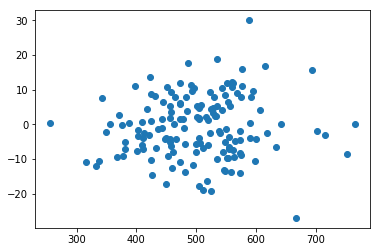

In [21]:
plt.scatter(predictions,y_test-predictions)

In [60]:
# evaluate the model by calculating the residual sum of squares
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error: ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# Rsquare
print('RSquare:', metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  7.22814865343
Mean Square Error:  79.813051651
Root Mean Square Error:  8.93381506698
RSquare: 0.989077123189


In [66]:
# so, tiem spent on website, or app, or length of membership, or nothing matter
# to affect the money customers spent yearly?
pd.DataFrame(lrm.coef_, x.columns, columns=['Coeff'])
# a single unit increase in X, like, time on app, result in $38 increase

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
# Final: spend time to work on the website? or improve the app even better? 
# or both web and app does not matter since length 